# Guided Project: Finding the Best Markets to Advertise An E-Learning Product
In this guided project, we assume that we work for an e-learning company that offers online programming courses. We want to promote our products by advertising in two countries. The goal of the project is to decide which markets would be best for advertising our product. 

## Data
We will use data from freeCodeCamp's 2017 New Coder Survey. The data is available on GitHub [here](https://github.com/freeCodeCamp/2017-new-coder-survey). We chose to use this data because it is free,publicly available dataset that contains useful information on individuals learning to code with a wide variety of interests and career goals. 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
survey = pd.read_csv('Datasets/2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [107]:
survey.shape

(18175, 136)

In [108]:
pd.options.display.max_columns = 150
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking the Representativity of the Sample
Most of the courses our company offers are in web and mobile development. However, we also cover other domains such as data science and game development. We want to answer questions about the population of new coders that are interested in these subjects, so we will analyze the sample to see how representative it is of our population of interest. 

In [109]:
career_table = survey['JobRoleInterest'].value_counts(normalize=True) * 100

In [110]:
career_table

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

Here, we see that people can report multiple job interests, which makes it challenging to see what the most common interests actually are in the above frequency table. However, we can see Full-Stack and Front-End Web Developers are the most popular choices. 

We would have a clearer picture of the distribution of career interests, though, if we displayed the count of the number of people with an interest in each particular field (which would allow each person to be counted in multiple categories). Below, we create such a frequency table. 

In [111]:
jobs = survey['JobRoleInterest'].str.split(',')

In [112]:
jobs = jobs[jobs.notnull()]
jobs = jobs.reset_index(drop=True)

In [113]:
jobs.head()

0                           [Full-Stack Web Developer]
1    [  Front-End Web Developer,  Back-End Web Deve...
2    [  Front-End Web Developer,  Full-Stack Web De...
3    [Full-Stack Web Developer,  Information Securi...
4                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [114]:
for job in jobs:
    for i in range(len(job)):
        job[i] = job[i].strip()

In [115]:
jobs.head()

0                           [Full-Stack Web Developer]
1    [Front-End Web Developer, Back-End Web Develop...
2    [Front-End Web Developer, Full-Stack Web Devel...
3    [Full-Stack Web Developer, Information Securit...
4                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [116]:
career_dic = {}
for values in jobs:
    for c in values:
        if c in career_dic:
            career_dic[c] += 1
        else:
            career_dic[c] = 1

In [117]:
career_freqs = pd.DataFrame.from_dict(career_dic, orient="index")

In [118]:
top_careers = career_freqs.sort_values(0, ascending=False).head(10)
top_careers = top_careers.sort_values(0)
top_careers = top_careers.rename(columns={0:'Count'})
top_careers

,Count
DevOps / SysAdmin,927
Data Engineer,1248
Information Security,1326
User Experience Designer,1469
Game Developer,1628
Data Scientist,1643
Mobile Developer,2304
Back-End Web Developer,2772
Front-End Web Developer,3533
Full-Stack Web Developer,4198


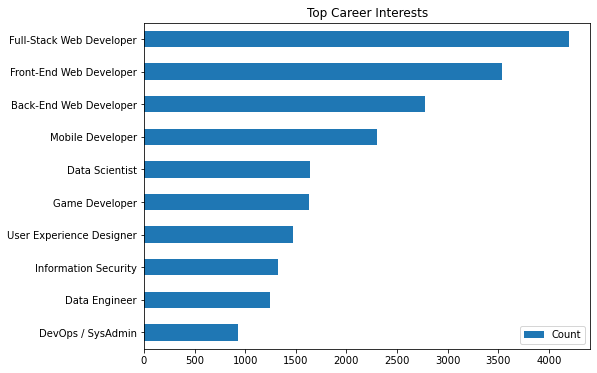

In [119]:
top_careers.plot.barh(title='Top Career Interests', figsize=(8,6))
plt.show()

Above, we see that web developers (Full-Stack, Front-End, and Back-End) are the three most popular career interests, followed by Mobile Developer, Data Scientist, and Game Developer. Additionally, below we see that 86% of respondents that reported a career interest have an interest in at least one of the web developer or mobile developer careers. Given that our company primarily creates content for web and mobile developement, and also has some Data Science and Game Developer content, it seems that the sample is reasonably representative of our target population. 

In [120]:
main_careers_count = 0
for row in jobs:
    if 'Full-Stack Web Developer' in row or 'Back-End Web Developer' in row or 'Front-End Web Developer' in row or 'Mobile Developer' in row:
        main_careers_count += 1
    else:
        pass

In [121]:
main_career_pct = main_careers_count / jobs.shape[0] * 100

In [122]:
main_career_pct

86.24141876430205

Now, we are only interested in respondents that reported a career interest, so below we will drop all rows where job interest is null (we already did that above for the `jobs` variable). 

In [123]:
survey = survey.dropna(axis=0, subset=['JobRoleInterest'])

## Finding the Top Countries
The starting point for our analysis will be finding the countries where the most learners are located. To maximize the reach of our advertisements, it makes sense to place ads in countries with more individuals interested in learning coding skills. 

In [124]:
survey['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [125]:
survey['CountryLive'].value_counts(normalize=True).head(10) * 100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

Here, we see that the United Stats is by far the most common country, with almost half of respondents living there. The second most popular country is India, with approximately 8% of respondents. Based on these results, most of our ads should be placed in the United States, with a few going to India, the UK, and Canada (the 3rd and 4th most popular locations). However, this information alone doesn't tell us how much individuals in each country are willing to spend on learning to code. Ideally, we will want to target our ads to indviduals who are willing to spend some money in their coding journey. 

Specifically, we are interested in how much individuals spend per month on learning to code as our company sells subscriptions for \\$59 per month. 

In [126]:
survey[['MoneyForLearning','MonthsProgramming']].head(10)

,MoneyForLearning,MonthsProgramming
1,80.0,6.0
2,1000.0,5.0
3,0.0,5.0
4,0.0,24.0
6,0.0,12.0
9,100.0,18.0
11,0.0,1.0
13,NaN,NaN
14,NaN,9.0
15,0.0,1.0


In [127]:
survey['MonthsProgramming'] = survey['MonthsProgramming'].replace(0.0, 1.0) #To avoid dividing by 0 when creating money_per_month variable

survey['money_per_month'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

In [128]:
survey[['MoneyForLearning','MonthsProgramming', 'money_per_month']].head(10)

,MoneyForLearning,MonthsProgramming,money_per_month
1,80.0,6.0,13.333333
2,1000.0,5.0,200.000000
3,0.0,5.0,0.000000
4,0.0,24.0,0.000000
6,0.0,12.0,0.000000
9,100.0,18.0,5.555556
11,0.0,1.0,0.000000
13,NaN,NaN,NaN
14,NaN,9.0,NaN
15,0.0,1.0,0.000000


In [129]:
survey = survey.dropna(axis=0, subset=['money_per_month', 'CountryLive']) #dropping null values in the variables of interest

In [130]:
top_four = ['United States of America', 'Canada','United Kingdom','India']
top_countries = survey[ survey['CountryLive'].isin(top_four) ] #limiting our analysis to the four countries with the most users

In [131]:
top_countries.groupby('CountryLive')['money_per_month'].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

Above, we see that the values seem low for the United Kingdom and Canada (or high for the United States). All three countries have similar income levels, so we would expect users in each to be willing to spend similar amounts on coding. Additionally, the value for India seems high as it is a lower-income country than the other three. It could be that there are some very high outliers that are skewing the results, so we will check for that below. 

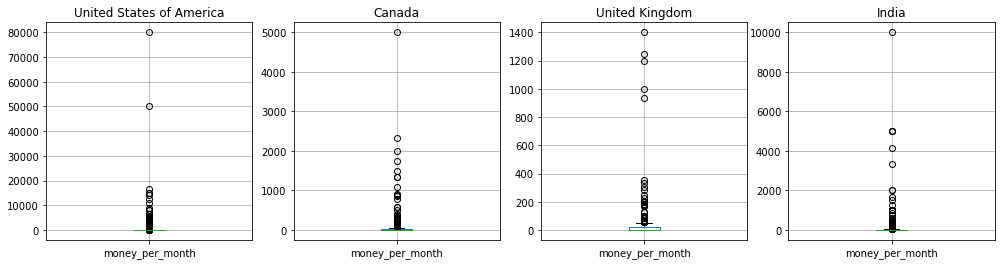

In [132]:
plt.figure(figsize=(17,4))
for i, country in zip(range(1,5), top_four):
    plt.subplot(1, 4, i)
    top_countries[top_countries['CountryLive'] == country].boxplot('money_per_month')
    plt.title(country)
plt.show()


Here, we see that there are some crazy outliers among individuals living in the United States and India in particular. There is even someone in the U.S. that supposedly spends \\$80,000 per month on coding. We will eliminate some of these outliers that seem too high as they are likely mistakes. In particular, it seems unlikely that anyone would spend more than \\$10,000 a month (most coding bootcamps, which are generally the priciest option to learn coding, are no more than \\$20,000 spread over 2-3 months). 

In [133]:
top_countries = top_countries[ top_countries['money_per_month'] < 10000]
top_countries.shape

(3906, 137)

Additionally, it seems unlikely that an individual would be able to spend more than \\$2,000 per month without attending a coding bootcamp. Most online learning services are considerably cheaper (at most a couple hundred dollars per month), and even one-off expenses like buying a computer would probably not push a person over \\$2,000 per month. We will further limit the data to individuals that spend less than \\$2,000 per month unless the individual has attended a bootcamp. 

In [134]:
top_countries['AttendedBootcamp'].value_counts()

0.0    3629
1.0     260
Name: AttendedBootcamp, dtype: int64

In [135]:
top_countries = top_countries[ (top_countries['money_per_month'] < 2000) | (top_countries['AttendedBootcamp'] == 1.0) ]
top_countries.shape

(3880, 137)

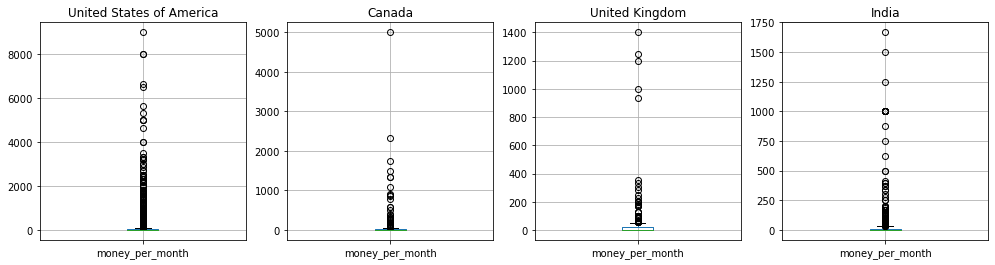

In [136]:
plt.figure(figsize=(17,4))
for i, country in zip(range(1,5), top_four):
    plt.subplot(1, 4, i)
    top_countries[top_countries['CountryLive'] == country].boxplot('money_per_month')
    plt.title(country)
plt.show()

In [137]:
top_countries.groupby('CountryLive')['money_per_month'].mean().sort_values(ascending=False)

CountryLive
United States of America    135.807747
Canada                      105.617701
India                        57.256604
United Kingdom               45.534443
Name: money_per_month, dtype: float64

After recalculating the mean amount spent per month by country, we can see that the values of the U.S. and India have dropped considerably. However, the U.K. still seems surprisingly low as it is less than half the value for Canada and the U.S., and even below India. One possibility is that the bootcamp industry is less developed in the U.K., and that is why expenditures are so much lower than in peer countries. 

In [138]:
no_boot = top_countries[top_countries['AttendedBootcamp'] == 0.0]
no_boot.groupby('CountryLive')['money_per_month'].mean().sort_values(ascending=False)

CountryLive
Canada                      55.674250
United States of America    54.305947
India                       53.923528
United Kingdom              34.468329
Name: money_per_month, dtype: float64

As we can see above, once we remove bootcamp participants from the data, the differences between the four countries decrease considerably, with the U.S., Canada, and India all within \\$2 of each other. However, respondents in the U.K. remain the lowest spenders by a wide margin. 

In [139]:
top_countries['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.922680
India                       11.726804
United Kingdom               7.190722
Canada                       6.159794
Name: CountryLive, dtype: float64

## Conclusion 
Based on these results, the U.S. should clearly be one of the countries we advertise in. American users account for approximately 75% of all respondents, and are the highest average spenders (when including bootcamp participants). I would also recommend that we advertise in India. India has the second most learners (around 10% of the total), and they spend a similar amount to the U.S. and Canada when bootcamp participants are not included. As our product is an online subscription that is only \\$59 per month, we are probably not of interest to those who would prefer to spend thousands on a bootcamp. However, our services would probably be appealing for those seeking an affordable alternative to bootcamps, and India appears to have a large number of learners that fit that description. 